In [ ]:
seed = 7
kmean = sklearn.cluster.KMeans(57, random_state=seed)

h_inertias = []
for i in range(1, nb_class):
    kmeans = KMeans(n_clusters=i, random_state=seed)
    kmeans.fit(color_histograms)
    h_inertias.append(kmeans.inertia_)

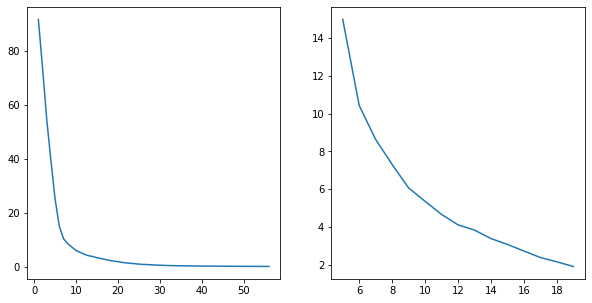

In [ ]:
_, ax_arr = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax_arr[0].plot(range(1,nb_class), h_inertias)
ax_arr[1].plot(range(5,20), h_inertias[5:20])
nb_wanted_classes = 13

We see that inertia decrease way slower when the number of clusters becomes higher than 6, by zooming in that area we decided to take 13 clusters.

In [24]:
kmean = sklearn.cluster.KMeans(nb_wanted_classes, random_state=seed)
kmean.fit(color_histograms)
predictions = kmean.predict(color_histograms)

In [25]:
@interact(class_=widgets.BoundedIntText(min=1, max=nb_wanted_classes - 1))
def print_class(class_: int) -> None:
    cluster_mask = predictions == class_
    nb_images = np.sum(cluster_mask)
    if (nb_images == 0):
        print("Aucune image pour ce cluster.")
        return

    nb_rows = (nb_images + 4) // 5
    _, ax_arr = plt.subplots(nrows=max(nb_rows, 2), ncols=5, figsize=(10, 2 * nb_rows))
    for i, x in enumerate(X[np.where(cluster_mask)[0]]):
        ax_arr[i // 5, i % 5].axis("off")
        ax_arr[i // 5, i % 5].imshow(x)

    for i in range(5):
        ax_arr[-1, i].axis("off")


interactive(children=(BoundedIntText(value=1, description='class_', max=12, min=1), Output()), _dom_classes=('…